# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# stundent details example: John S. 9812
#                       student details 1: Shani S. 3683 


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: Build and evaluate classification models (KNN, Decision Tree, Random Forest) using Pipeline, GridSearchCV, and performance metrics. 
Propmpt1: Create a Pipeline with StandardScaler and three classifiers:
KNN, Decision Tree, and Random Forest.
Use GridSearchCV to optimize hyperparameters on the training set.
    
Propmpt2: Display a comparison table of the models showing:
Model name
Best hyperparameters
Best F1_macro score from cross-validation
Select the best-performing model.
    
Propmpt3:Train the selected model on the full training set.
Evaluate it on the test set using:
Accuracy
F1_macro
Classification report
Confusion matrix (purple color, no color bar, Y-axis starts from bottom) 

   
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
The dataset contains chemical and physical measurements of wines, where each row represents a sample of a specific wine. For each wine, features such as alcohol percentage, acidity, magnesium content, color intensity, concentrations of various phenols, and more were measured. In addition, there is a target column representing the wine’s class or quality level (for example: red/white wine, or a quality category from 0 to 2).
The main task is a classification problem: to build a machine learning model that receives the wine’s features as input and predicts its correct class. The goal is to train a model that can accurately classify the type or quality of the wine based on its chemical properties, thereby assisting in identification, quality controlץ.



    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

 # שלב ראשון: איסוף נתונים

In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def load_trainset():
    trainset = pd.read_csv('wine_train.csv')
    testset = pd.read_csv('wine_test.csv')
    return trainset , testset

In [13]:
r_trainset, r_testset = load_trainset()
r_trainset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [15]:
r_testset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


# שלב שני: ניתוח הנתונים (EDA)

In [18]:
r_trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

In [20]:
r_trainset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


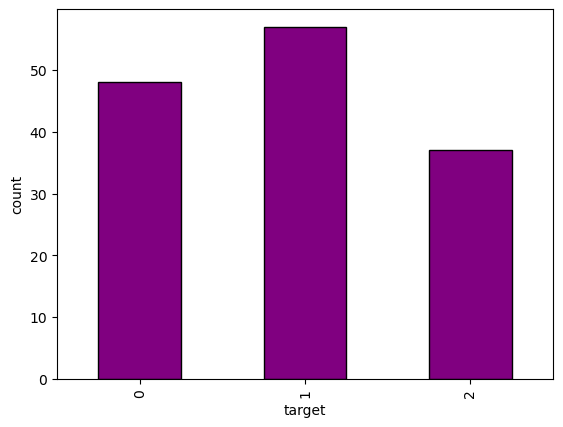

In [22]:
r_trainset['target'].value_counts().sort_index().plot(kind='bar', color = 'purple',edgecolor='black')
plt.xlabel('target')
plt.ylabel('count')
plt.show()

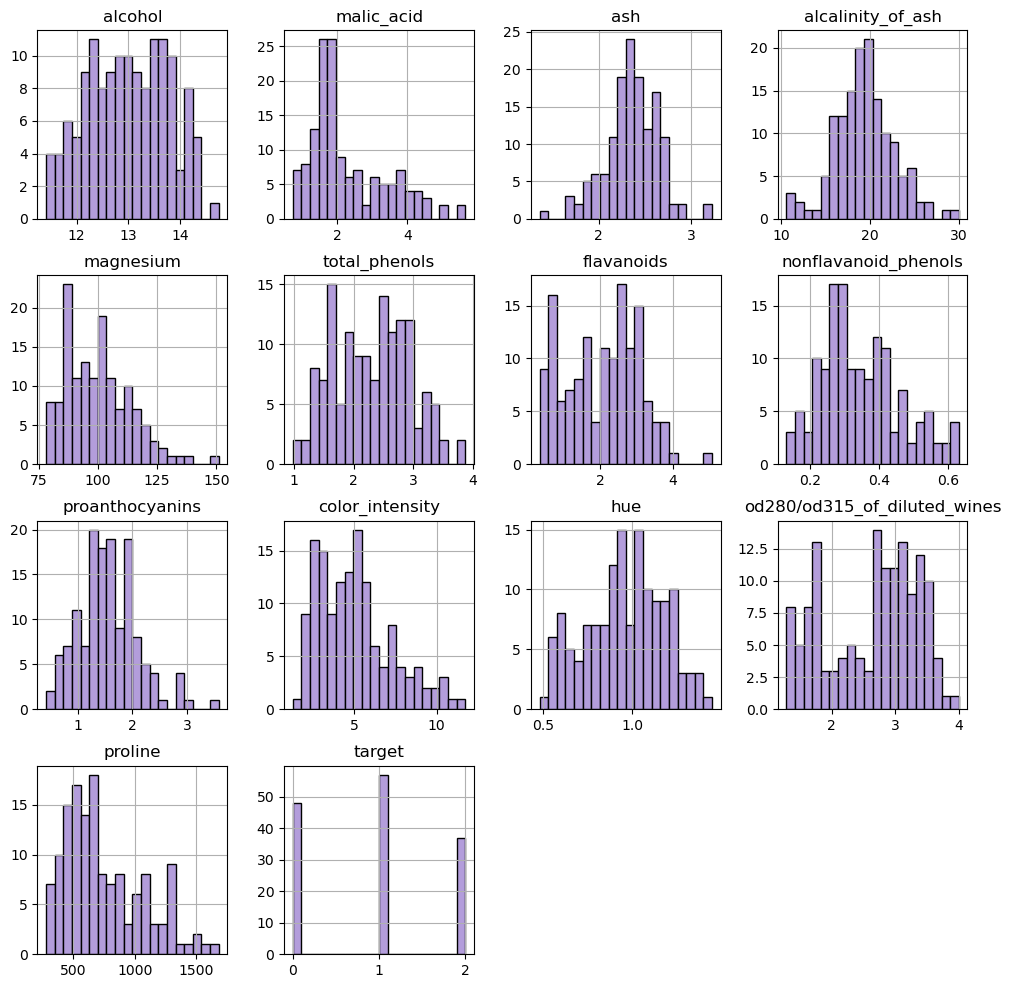

In [24]:
r_trainset.hist(bins=20,figsize=(12,12), color ='#B39DDB' ,edgecolor='black' )
plt.show()

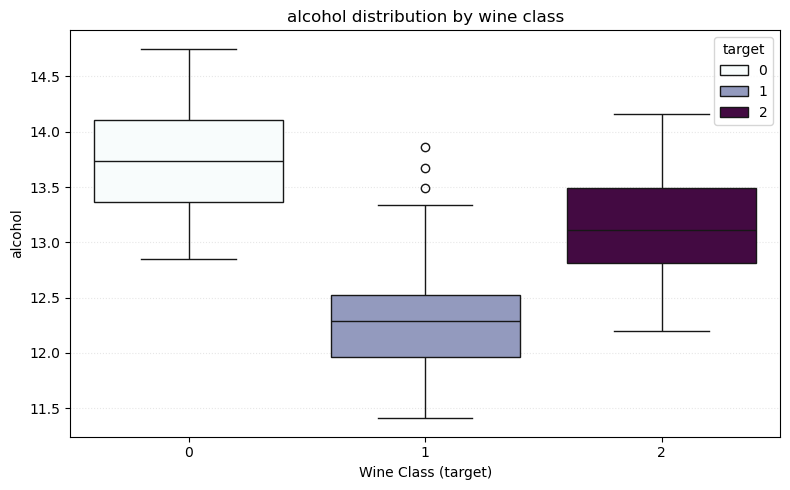

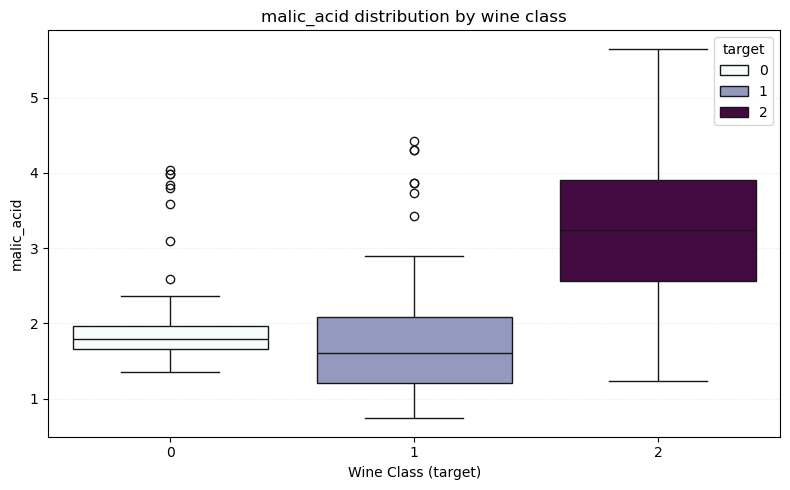

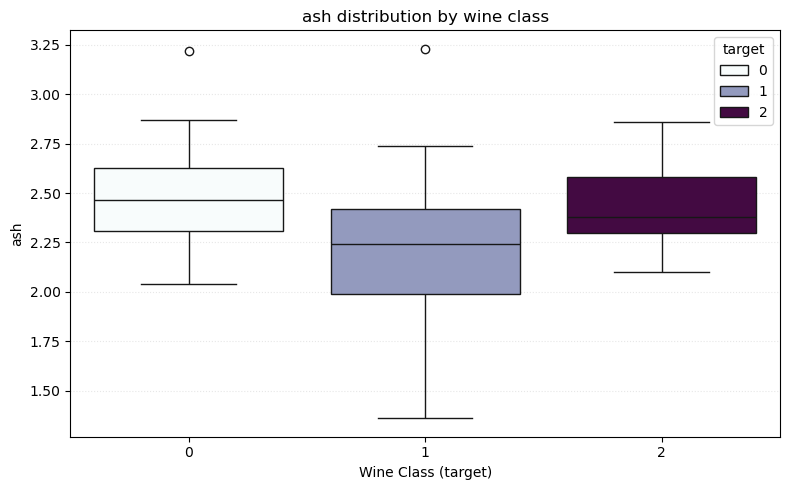

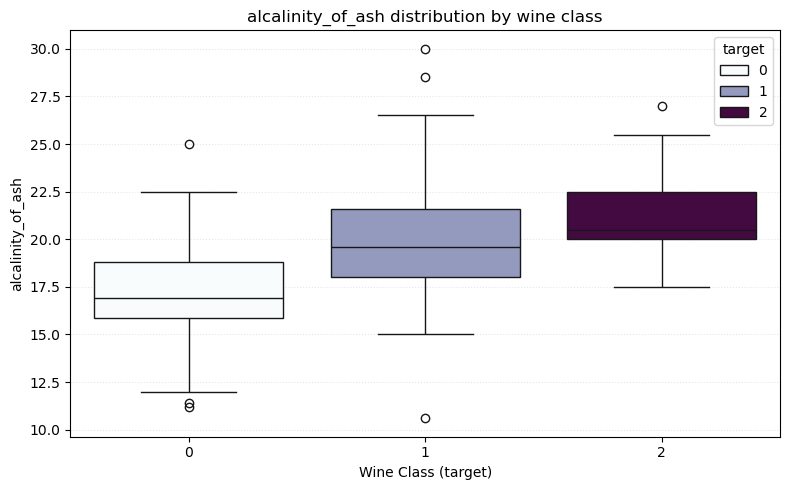

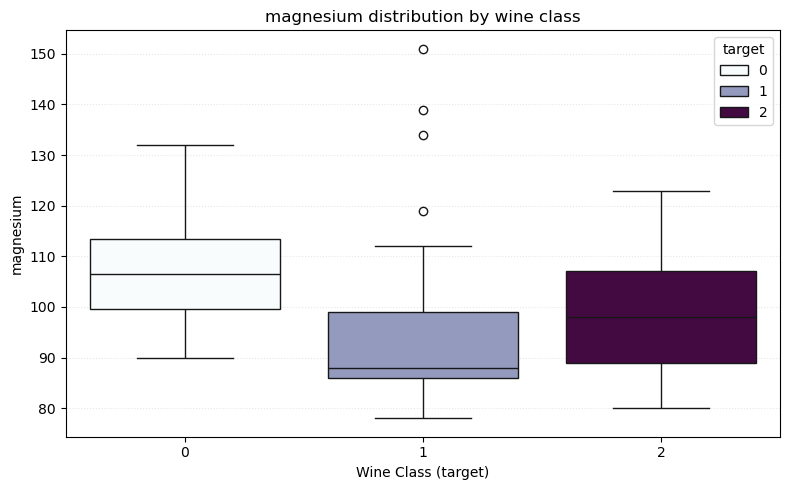

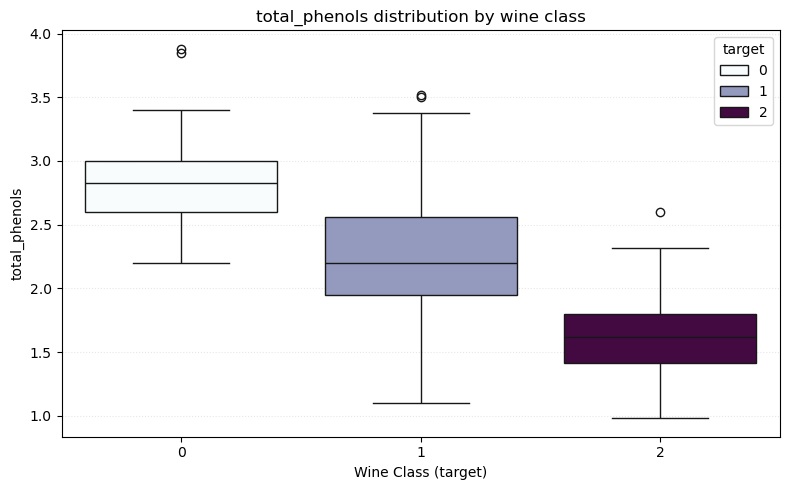

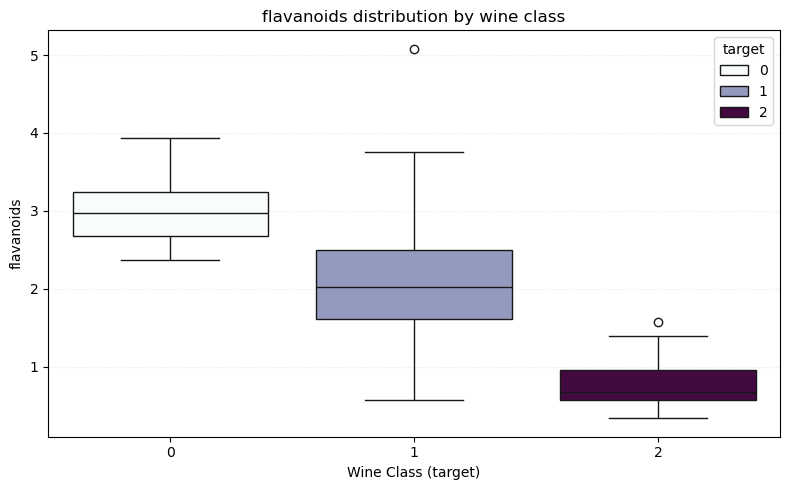

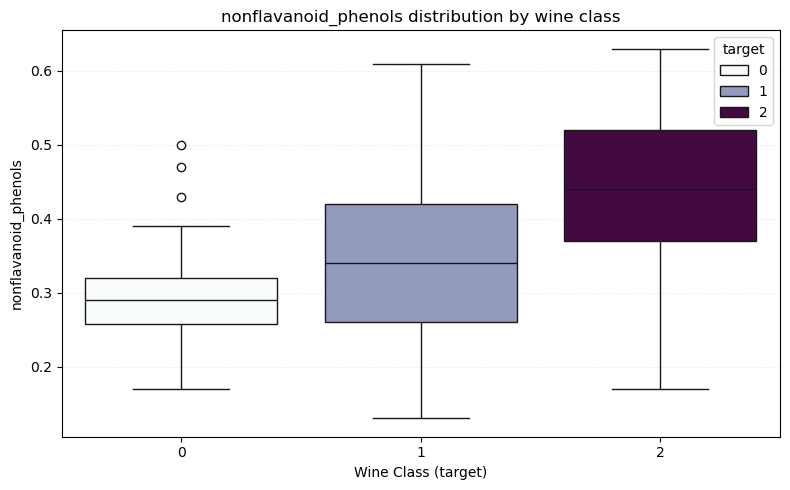

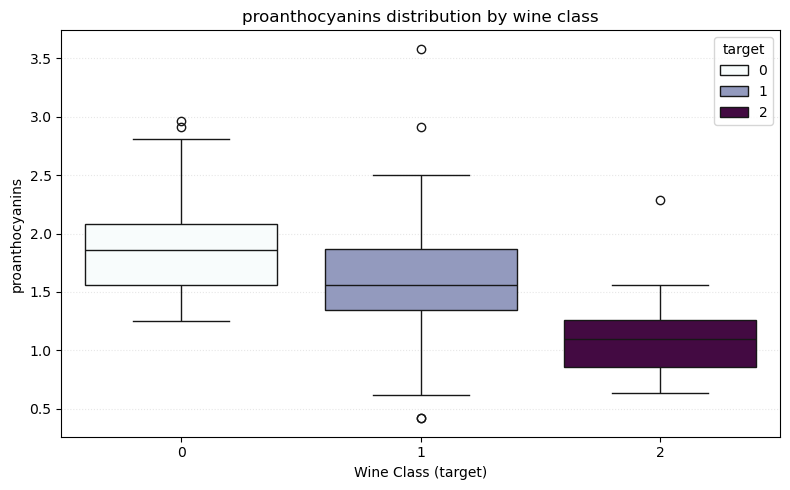

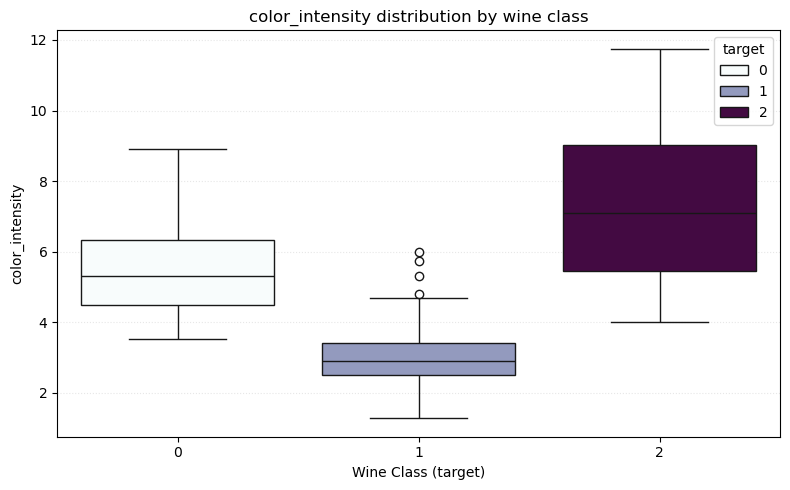

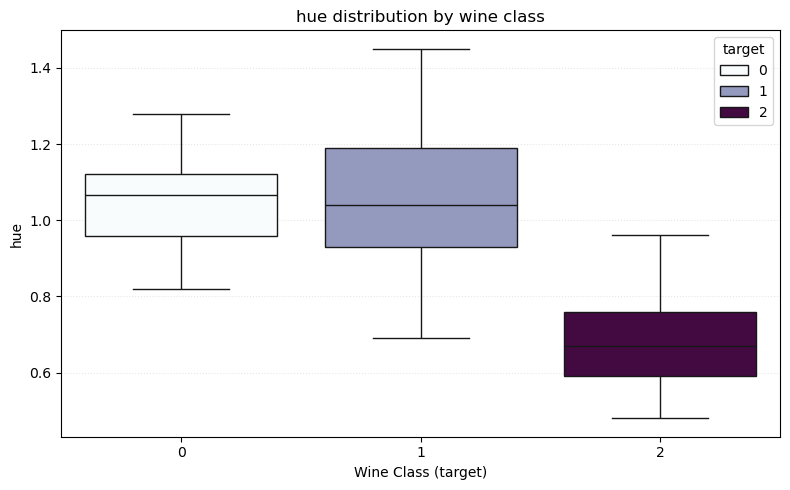

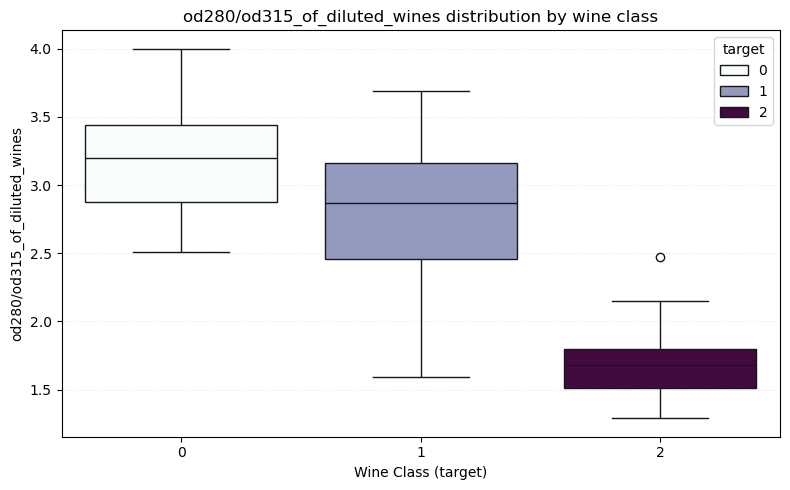

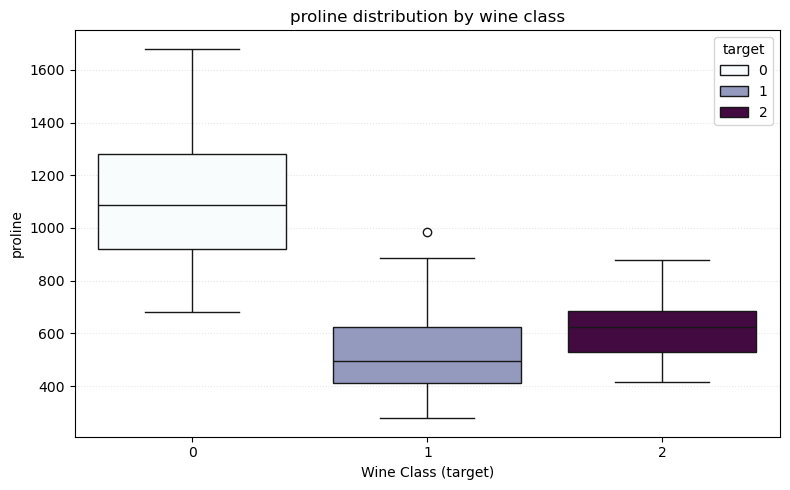

In [29]:
features = r_trainset.drop('target', axis=1).columns


for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=r_trainset, x='target', y=feature, palette='BuPu' , hue = 'target')
    plt.title(f'{feature} distribution by wine class')
    plt.xlabel('Wine Class (target)')
    plt.ylabel(feature)
    plt.grid(True, axis='y', linestyle=':', alpha=0.3)
    plt.tight_layout()
    plt.show()


<Axes: >

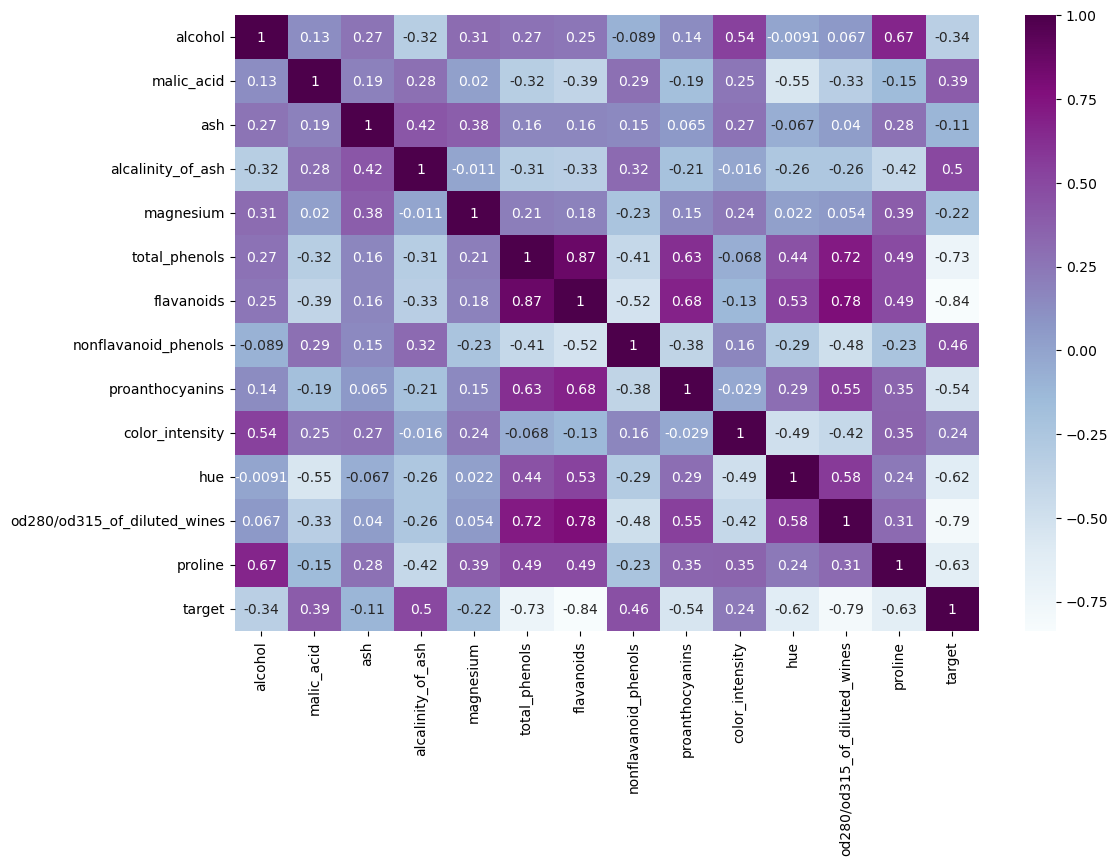

In [26]:
plt.figure(figsize = (12,8))
sns.heatmap(r_trainset.corr(),annot = True, cmap='BuPu' )

-> Very high correlation between flavanoids and total_phenols (0.87).
This is almost redundant—these features are telling almost the same story. It’s worth considering dropping one of them, or at least being aware that they provide overlapping information.

-> od280/od315_of_diluted_wines is also highly correlated with total_phenols (0.72) and with flavanoids (0.78).
Again, this suggests potential information redundancy (collinearity), so not all of these features may be necessary.

-> proline is strongly correlated with alcohol (0.67), od280/od315 (0.58), and total_phenols (0.49).
This makes proline a strong and likely important feature for predictive models.

-> color_intensity shows moderate correlation with alcohol (0.54) and with the target variable (0.36).
This means color_intensity does contribute to the classification, though not as strongly as some others.

-> flavanoids has a very strong negative correlation with the target (-0.84!).
In other words, as the flavanoids value increases, the likelihood of a specific target category increases dramatically. This is a highly significant feature for classification.

-> total_phenols has a moderately strong negative correlation with the target (-0.73).
Again, this feature offers excellent discriminatory power.

-> od280/od315_of_diluted_wines has a strong negative correlation with the target (-0.79).
This is another key feature that helps distinguish between target classes.

# שלב שלישי: הנדסת מאפיינים

In [33]:
r_trainset = r_trainset.drop_duplicates().reset_index(drop=True)
r_trainset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
138,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0,0
139,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0,1
140,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0


In [35]:
def outliers_rows():
    outlier_cols = ['malic_acid' , 'ash' , 'alcalinity_of_ash' , 'magnesium' , 'proanthocyanins' , 'color_intensity' , 'proline']
    outlier_rows = pd.DataFrame()
    for col in outlier_cols:
        Q1 = np.percentile(r_trainset[col],25)
        Q3 = np.percentile(r_trainset[col],75)

        IQR = Q3 - Q1

        outliers = r_trainset[(r_trainset[col]<(Q1 - 1.5 * IQR))| ( r_trainset[col]> (Q3+1.5*IQR))]
    
        outliers = outliers.copy()
        outliers[col] = outliers[col].astype(str) + '*'

        outlier_rows = pd.concat([outlier_rows, outliers])
    outlier_rows = outlier_rows.drop_duplicates()
    return outlier_rows


In [37]:
outliers = outliers_rows()
outlier_rows_sorted = outliers.sort_index()
outlier_rows_sorted

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
2,12.37,0.94,1.36*,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
2,12.37,0.94,1.36,10.6*,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
5,13.11,1.01,1.7*,15.0,78.0,2.98,3.18,0.26,2.28,5.3,1.12,3.18,502.0,1
25,12.21,1.19,1.75,16.8,151.0*,1.85,1.28,0.14,2.5,2.85,1.28,3.07,718.0,1
29,13.71,5.65*,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
35,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75*,0.57,1.78,620.0,2
36,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58*,2.9,0.75,2.81,562.0,1
40,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.8*,0.48,1.47,480.0,2
41,12.99,1.67,2.6,30.0*,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1
41,12.99,1.67,2.6,30.0,139.0*,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1


## Part 3 - Experiments
You could add as many code cells as needed

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train = r_trainset.drop('target', axis = 1)
y_train = r_trainset['target']

pipelines = {
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier())
    ]),
    'DecisionTree': Pipeline([
        ('scaler', StandardScaler()),
        ('model', DecisionTreeClassifier())
    ]),
    'RandomForest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier())
    ])
}

param_grids = {
    'KNN': {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'model__max_depth': [3, 5, 10],
        'model__criterion': ['gini', 'entropy']
    },
    'RandomForest': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [5, 10],
        'model__criterion': ['gini', 'entropy']
    }
}

results = []

for name, pipeline in pipelines.items():
    grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='f1_macro')
    grid.fit(X_train, y_train)
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Best Score': round(grid.best_score_, 4)
    })

results_df = pd.DataFrame(results)
results_df['Best Params'] = results_df['Best Params'].apply( lambda d: {k.replace('model__', ''): v for k, v in d.items()} )
pd.set_option('display.max_colwidth', None)
results_df


,Model,Best Params,Best Score
0,KNN,"{'n_neighbors': 7, 'weights': 'distance'}",0.9644
1,DecisionTree,"{'criterion': 'entropy', 'max_depth': 3}",0.9440
2,RandomForest,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}",0.9863


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [75]:
print("the chosen model: " ,name , grid.best_params_)

the chosen model:  RandomForest {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__n_estimators': 50}


In [79]:
final_model = grid.best_estimator_
final_model.fit(X_train, y_train)

print("The model was successfully trained!")


The model was successfully trained!


## Part 5 - Apply on test and show model performance estimation

In [81]:
X_test = r_testset.drop('target', axis=1)
y_test = r_testset['target']

Accuracy: 0.9722
F1 Macro: 0.9732


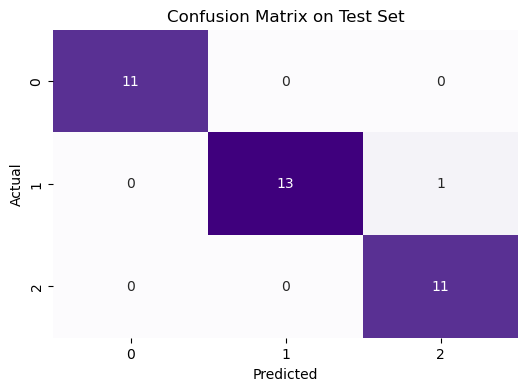

In [97]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_pred = final_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Macro: {f1:.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False )
plt.title("Confusion Matrix on Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

